# <u>**Kaggle Competitions: House Price - Pipeline & Modeling (Linear Model)**</u>

## <span style = 'color: red'>**Importing Stage**</span>

In [1]:
# import basic data cleaning libraries
import pandas as pd
import numpy as np
# hide warnings if max iteration time does not converge
import warnings
# data visualization (along with EDA stage)
import matplotlib.pyplot as plt
import seaborn as sns
# input missing data
from sklearn.impute import SimpleImputer
# data preprocessing (along with EDA stage)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
# data splitting
from sklearn.model_selection import train_test_split
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# saving dataframes or models
import joblib

In [2]:
# ignore warning messages
warnings.filterwarnings('ignore')
# show all columns
pd.set_option('display.max_columns', None)

## <span style = 'color: red'>**Import DataFrame After Data Cleaning**</span>

In [3]:
df_clean = joblib.load('../data/df_clean.pkl')
df_clean.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  NoAlley      Reg   
1   2          20       RL         80.0     9600   Pave  NoAlley      Reg   
2   3          60       RL         68.0    11250   Pave  NoAlley      IR1   
3   4          70       RL         60.0     9550   Pave  NoAlley      IR1   
4   5          60       RL         84.0    14260   Pave  NoAlley      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu  \
0             1          Gd             8        Typ           0  NoFirePlace   
1             1          TA             6        Typ           1           TA   
2             1          Gd             6        Typ           1           TA   
3             1  

In [4]:
df_clean.shape

(1460, 101)

In [5]:
y = df_clean['SalePrice']
x = df_clean.drop(columns = ['SalePrice'])

In [6]:
y_log = np.log1p(y)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y_log, test_size = 0.2, random_state = 42)

## <span style = 'color: red'>**Pipeline - Preprocessing & Modeling**</span>

#### <span style = 'color: yellow'>**Preprocessor for <u>Linear Regression Model</u>**

#### <u>OneHotEncoder</u>: 	MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, LotConfig, Neighborhood, Condition1,
#### <u>OneHotEncoder</u>:  Style_Type, Roof_Style_Mat, Exterior1st, Exterior2nd, is_MasVnr, ExterQual, ExterCond,
#### <u>OneHotEncoder</u>:  Foundation, Heating, HeatingQC, CentralAir, KitchenQual, Functional, FireplaceQu
#### <u>OneHotEncoder</u>:  GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, 
#### <u>OneHotEncoder</u>:  MoSold, YrSold, Year_Month_Sold, Season_Sold, SaleType, SaleCondition
#### --------
#### <u>SimpleImputer + OneHotEncoder</u>:  BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, BsmtExposure, Electrical
#### --------
#### <u>PowerTransformer + Scaler</u>:  LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, TotalFlrSF, GrLivArea,
#### <u>PowerTransformer + Scaler</u>:  GarageArea, WoodDeckSF, OpenPorchSF, Total_Porch_Area
#### --------
#### <u>Scaler</u>:  Year_Avg, GarageYrBlt
#### --------
#### <u>SimpleImputer + PowerTransformer + Scaler</u>:  LotFrontage, MasVnrArea
#### --------
#### <u>SpecialTreatment</u>:  LotRatio - SimpleImputer (median) for LotFrontage + LotFrontage / LotArea + PowerTransformer + Scaler
#### <u>SpecialTreatment</u>:  BsmtFinCombined - SimpleImputer (most frequent) for BsmtFinType1 & BsmtFinType2 + (BsmtFinType1 + BsmtFinType2) + OneHotEncoder
#### --------
#### <u>Passthrough</u>:  OverallQual, OverallCond, ExteriorSame, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces
#### <u>Passthrough</u>:  GarageCars, is_LowQualFinSF, Has_Open_Porch, Has_Wooden_Deck, Has_Enclose_Porch, Has_3Sn_Porch, Has_Screen_Porch, Has_Pool

In [8]:
# OneHotEncoder
onehot_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                   'Style_Type', 'Roof_Style_Mat', 'Exterior1st', 'Exterior2nd', 'is_MasVnr', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 
                   'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                   'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'Year_Month_Sold', 'Season_Sold', 'SaleType', 'SaleCondition']

# SimpleImputer with most frequent + OneHotEncoder
impute_onehot_features = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Electrical']

# PowerTransformer + Standardize
power_features = ['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalFlrSF', 'GrLivArea', 'GarageArea', 
                  'WoodDeckSF', 'OpenPorchSF', 'Total_Porch_Area']

# Standardize
scale_features = ['Year_Avg', 'GarageYrBlt']

# SimpleImputer + PowerTransformer + Standardize
impute_power_features = ['LotFrontage', 'MasVnrArea']

# binary or ordinal features just keep them as they are
pass_features = ['OverallQual', 'OverallCond', 'ExteriorSame', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'is_LowQualFinSF', 'Has_Open_Porch', 'Has_Wooden_Deck', 'Has_Enclose_Porch', 'Has_3Sn_Porch',
                 'Has_Screen_Porch', 'Has_Pool']

class LotRatioTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return (X[:, [0]] / X[:, [1]])
        
    def get_feature_names_out(self, input_features=None):
        return ["LotRatio"]

class BsmtFinCombinedTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return (X[:, [0]] + X[:, [1]])
        
    def get_feature_names_out(self, input_features=None):
        return ["BsmtFinCombined"]

preprocessor = ColumnTransformer (
    transformers = [
        ('onehot_encoder', OneHotEncoder(handle_unknown = 'ignore'), onehot_features),

        ('impute_onehot', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]), impute_onehot_features),

        ('power_scaler', PowerTransformer(method = 'yeo-johnson', standardize = True), power_features),

        ('scaler', StandardScaler(), scale_features),

        ('impute_power', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('power_scaler', PowerTransformer(method = 'yeo-johnson', standardize = True))
        ]), impute_power_features),

        ('pass', 'passthrough', pass_features),

        ('lot_ratio', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('feature_eng', LotRatioTransformer()),
            ('power_scaler', PowerTransformer(method = 'yeo-johnson', standardize = True))
        ]), ['LotFrontage', 'LotArea']),

        ('bsmt_combine', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'most_frequent')),
            ('feature_eng', BsmtFinCombinedTransformer()),
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]), ['BsmtFinType1', 'BsmtFinType2'])
    ],
    remainder = 'drop'
)

#### <span style = 'color: yellow'>**Model for <u>Linear Regression Model, Lasso, Ridge, ElasticNet</u>**

In [9]:
lasso_linear_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

ridge_linear_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

elastic_net_linear_model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('elastic_net', ElasticNet())
])

## <span style = 'color: red'>**GridSearchCV**</span>

In [10]:
# define the parameter grid for Lasso Regression Model
lasso_param_grid = [
    {'lasso__alpha': [0.01, 0.1, 1, 10, 100],
     'lasso__max_iter': [1000, 5000, 10000]}
]
# define the parameter grid for Ridge Regression Model
ridge_param_grid = [
    {'ridge__alpha': [0.01, 0.1, 1, 10, 100],
     'ridge__max_iter': [1000, 5000, 10000]}
]
# define the parameter grid for Elastic Net Regression Model
elastic_param_grid = [
    {'elastic_net__alpha': [0.01, 0.1, 1, 10, 100],
     'elastic_net__l1_ratio': [0.1, 0.5, 0.9],
     'elastic_net__max_iter': [1000, 5000, 10000]}
]

### Prediction & Evaluation

In [11]:
lasso_grid = GridSearchCV(
    estimator = lasso_linear_model,
    param_grid = lasso_param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    verbose = 1
)

ridge_grid = GridSearchCV(
    estimator = ridge_linear_model,
    param_grid = ridge_param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    verbose = 1
)

elastic_net_grid = GridSearchCV(
    estimator = elastic_net_linear_model,
    param_grid = elastic_param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    verbose = 1
)

In [12]:
lasso_grid.fit(x_train, y_train)
print('--Lasso Regression Model--')
print('Best Parameters: ', lasso_grid.best_params_)
print('Best Cross-Validation Score: {:.4f}\n'.format(lasso_grid.best_score_))

ridge_grid.fit(x_train, y_train)
print('--Ridge Regression Model--')
print('Best Parameters: ', ridge_grid.best_params_)
print('Best Cross-Validation Score: {:.4f}\n'.format(ridge_grid.best_score_))

elastic_net_grid.fit(x_train, y_train)
print('--Elastic Net Regression Model--')
print('Best Parameters: ', elastic_net_grid.best_params_)
print('Best Cross-Validation Score: {:.4f}'.format(elastic_net_grid.best_score_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
--Lasso Regression Model--
Best Parameters:  {'lasso__alpha': 0.01, 'lasso__max_iter': 1000}
Best Cross-Validation Score: -0.1443

Fitting 5 folds for each of 15 candidates, totalling 75 fits
--Ridge Regression Model--
Best Parameters:  {'ridge__alpha': 100, 'ridge__max_iter': 1000}
Best Cross-Validation Score: -0.1306

Fitting 5 folds for each of 45 candidates, totalling 225 fits
--Elastic Net Regression Model--
Best Parameters:  {'elastic_net__alpha': 0.01, 'elastic_net__l1_ratio': 0.1, 'elastic_net__max_iter': 1000}
Best Cross-Validation Score: -0.1286


In [13]:
best_lasso_model = lasso_grid.best_estimator_

y_pred_log = best_lasso_model.predict(x_val)
y_pred = np.expm1(y_pred_log)

y_val_actual = np.expm1(y_val)

mse = mean_squared_error(y_val_actual, y_pred)
log_mse = mean_squared_error(y_val, y_pred_log)

rmse = np.sqrt(mse)
log_rmse = np.sqrt(log_mse)

mae = mean_absolute_error(y_val_actual, y_pred)

r2 = r2_score(y_val_actual, y_pred)

print('--Lasso Regression Model--')
print('RMSE: {:.4f}'.format(rmse))
print('Log-RMSE: {:.4f}'.format(log_rmse))
print('MAE: {:.4f}'.format(mae))
print('r2 score: {:.4f}\n'.format(r2))

best_ridge_model = ridge_grid.best_estimator_

y_pred_log = best_ridge_model.predict(x_val)
y_pred = np.expm1(y_pred_log)

y_val_actual = np.expm1(y_val)

mse = mean_squared_error(y_val_actual, y_pred)
log_mse = mean_squared_error(y_val, y_pred_log)

rmse = np.sqrt(mse)
log_rmse = np.sqrt(log_mse)

mae = mean_absolute_error(y_val_actual, y_pred)

r2 = r2_score(y_val_actual, y_pred)

print('--Lasso Regression Model--')
print('RMSE: {:.4f}'.format(rmse))
print('Log-RMSE: {:.4f}'.format(log_rmse))
print('MAE: {:.4f}'.format(mae))
print('r2 score: {:.4f}\n'.format(r2))

best_elastic_net_model = elastic_net_grid.best_estimator_

y_pred_log = best_elastic_net_model.predict(x_val)
y_pred = np.expm1(y_pred_log)

y_val_actual = np.expm1(y_val)
                       
mse = mean_squared_error(y_val_actual, y_pred)
log_mse = mean_squared_error(y_val, y_pred_log)
     
rmse = np.sqrt(mse)
log_rmse = np.sqrt(log_mse)

mae = mean_absolute_error(y_val_actual, y_pred)

r2 = r2_score(y_val_actual, y_pred)

print('--Elastic Net Regression Model--')
print('RMSE: {:.4f}'.format(rmse))
print('Log-RMSE: {:.4f}'.format(log_rmse))
print('MAE: {:.4f}'.format(mae))
print('r2 score: {:.4f}'.format(r2))

--Lasso Regression Model--
RMSE: 32547.3872
Log-RMSE: 0.1472
MAE: 18519.9995
r2 score: 0.8619

--Lasso Regression Model--
RMSE: 28563.7482
Log-RMSE: 0.1334
MAE: 16349.6620
r2 score: 0.8936

--Elastic Net Regression Model--
RMSE: 27628.3961
Log-RMSE: 0.1328
MAE: 15829.4914
r2 score: 0.9005


## <span style = 'color: red'>**Feature Importance & Refine - Linear Regression Model**</span>

#### <span style = 'color: yellow'>**Lasso Regression Model**

In [14]:
# get the name of the model
trained_lasso_model = best_lasso_model.named_steps['lasso']
# get the feature importance (coefficients)
trained_lass_model_coef = trained_lasso_model.coef_
# get the feature name
trained_lass_model_feature = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()
# create DataFrame
coef_df = pd.DataFrame({
    'Feature': trained_lass_model_feature,
    'Coefficient': trained_lass_model_coef
}).sort_values('Feature', ascending = False)
coef_df.head()

Feature  Coefficient
367                scaler__Year_Avg     0.091871
368             scaler__GarageYrBlt     0.002532
364        power_scaler__WoodDeckSF     0.004708
366  power_scaler__Total_Porch_Area     0.002826
361        power_scaler__TotalFlrSF     0.042157

<Axes: >

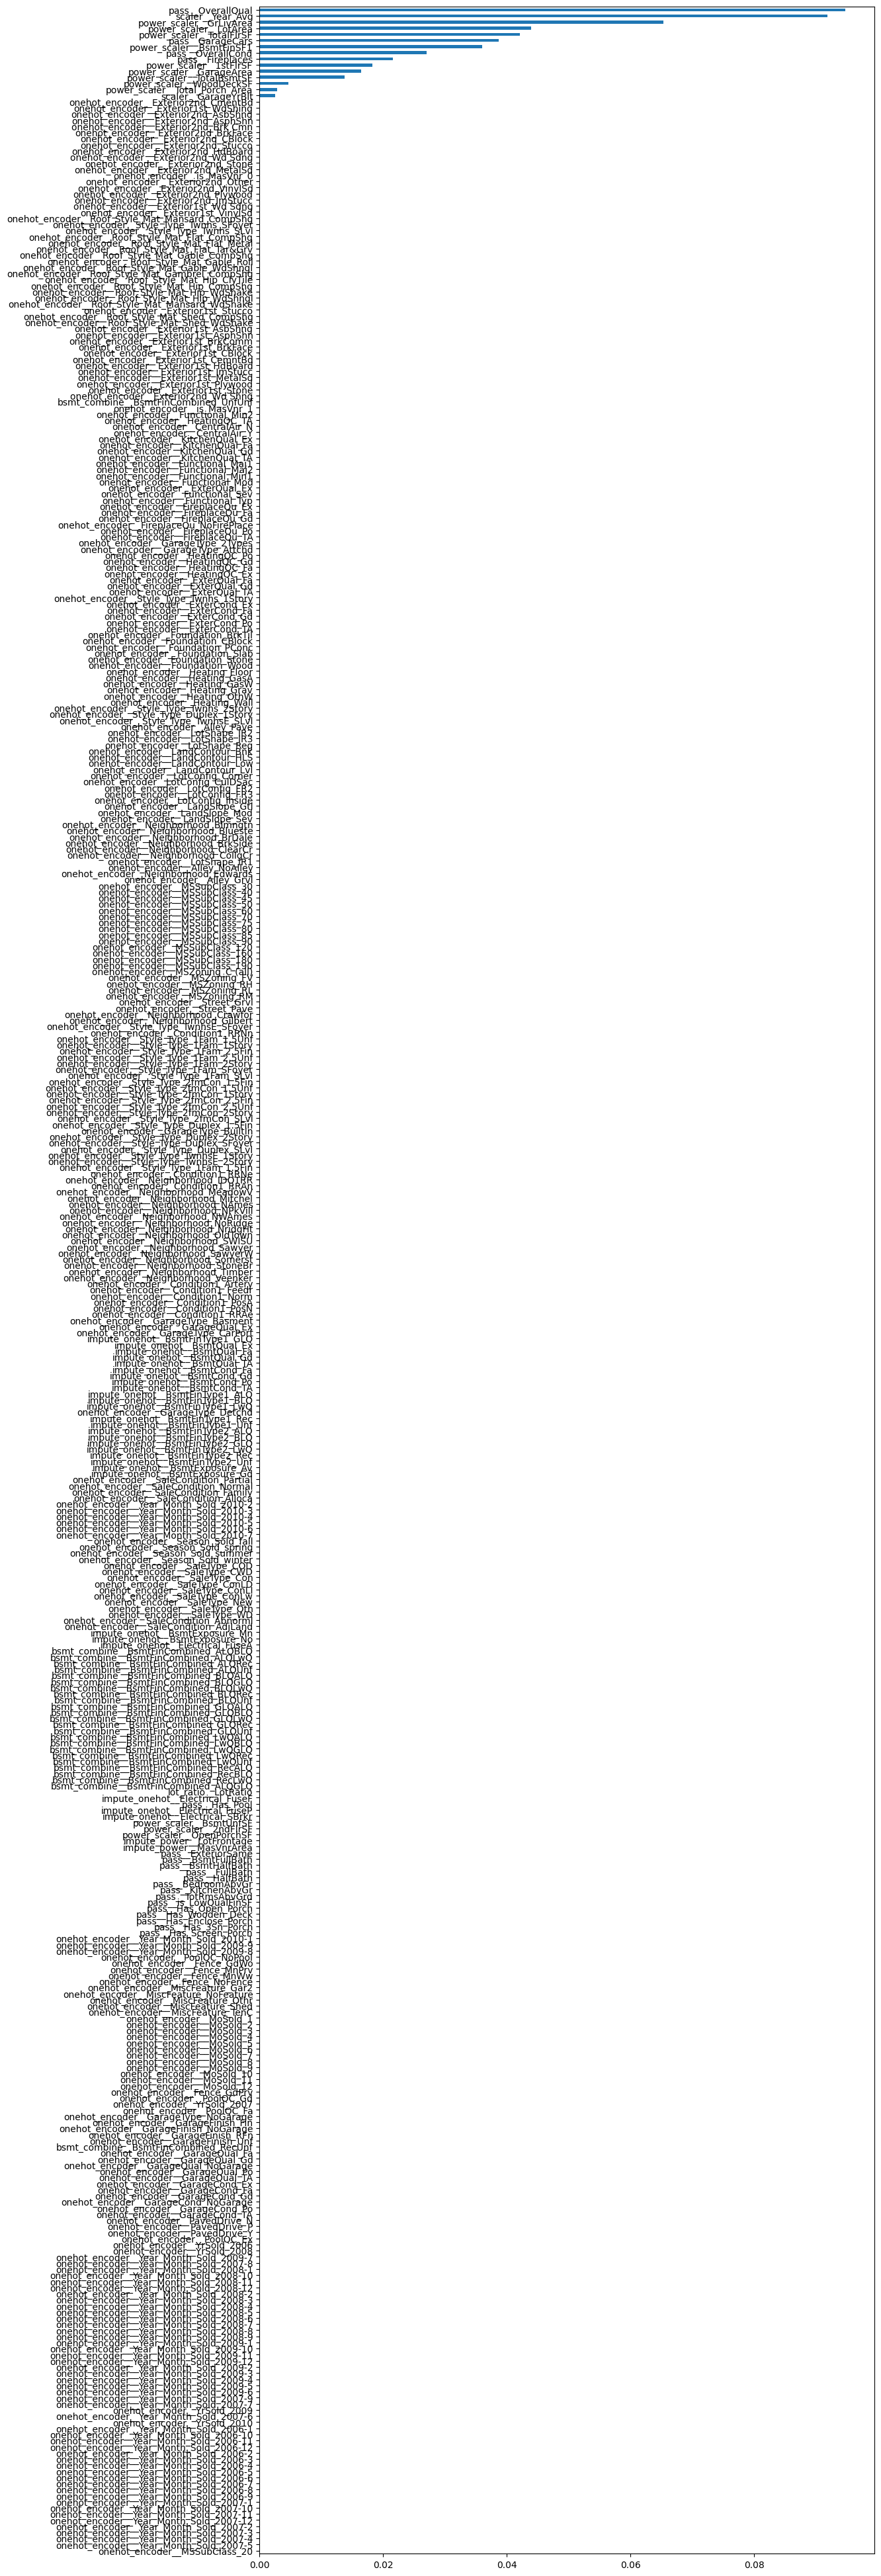

In [15]:
coef_df = pd.Series(trained_lass_model_coef, index = trained_lass_model_feature)
coef_df.sort_values().plot(kind = 'barh', figsize = [12, 50])

#### <span style = 'color: yellow'>**Ridge Regression Model**

In [16]:
# get the name of the model
trained_ridge_model = best_ridge_model.named_steps['ridge']
# get the feature importance (coefficients)
trained_ridge_model_coef = trained_ridge_model.coef_
# get the feature name
trained_ridge_model_feature = best_ridge_model.named_steps['preprocessor'].get_feature_names_out()
# create DataFrame
coef_df = pd.DataFrame({
    'Feature': trained_ridge_model_feature,
    'Coefficient': trained_ridge_model_coef
}).sort_values('Feature', ascending = False)
coef_df.head()

Feature  Coefficient
367                scaler__Year_Avg     0.039630
368             scaler__GarageYrBlt     0.009740
364        power_scaler__WoodDeckSF     0.008739
366  power_scaler__Total_Porch_Area     0.008986
361        power_scaler__TotalFlrSF     0.044571

<Axes: >

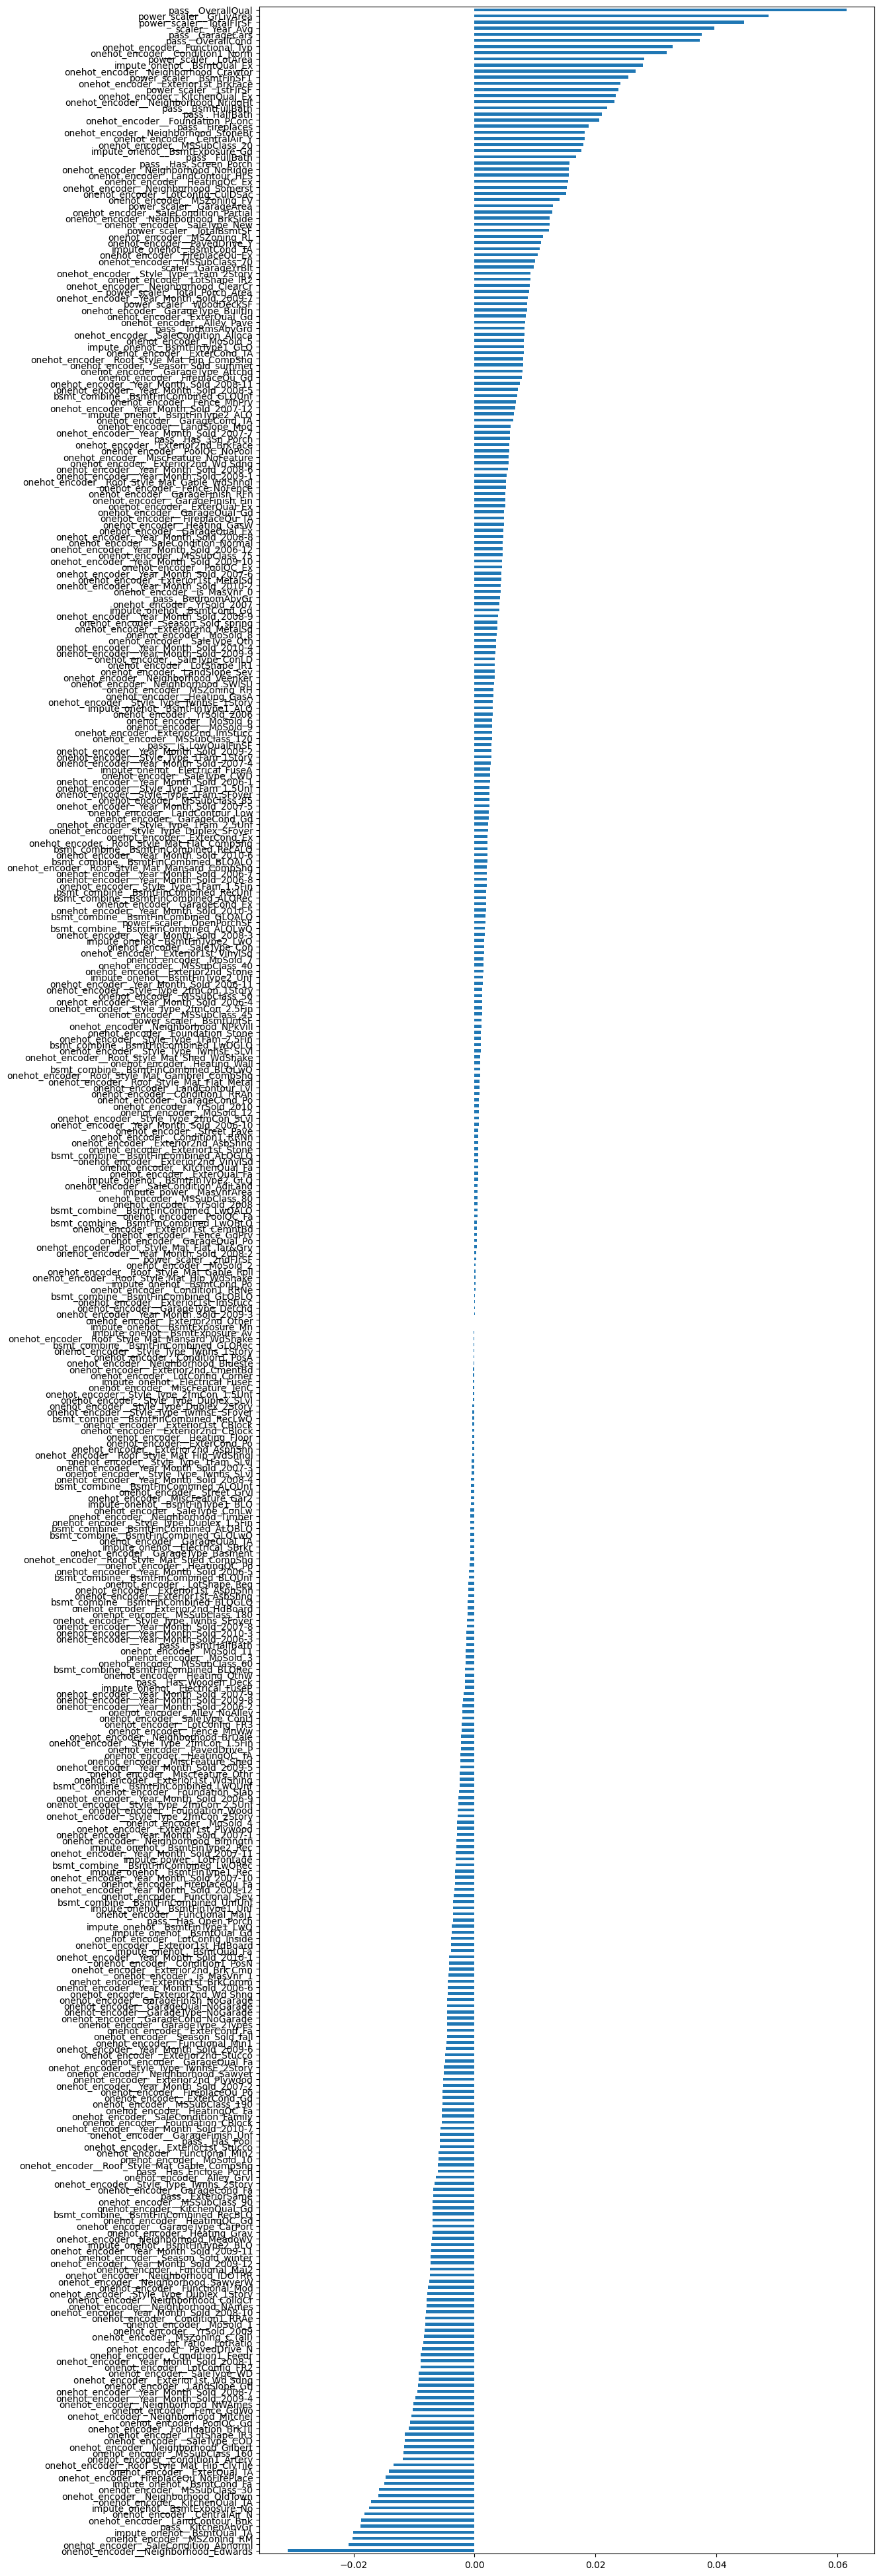

In [17]:
coef_df = pd.Series(trained_ridge_model_coef, index = trained_ridge_model_feature)
coef_df.sort_values().plot(kind = 'barh', figsize = [12, 50])

#### <span style = 'color: yellow'>**Elastic Net Regression Model**

In [18]:
# get the name of the model
trained_elastic_net_model = best_elastic_net_model.named_steps['elastic_net']
# get the feature importance (coefficients)
trained_elastic_net_model_coef = trained_elastic_net_model.coef_
# get the feature name
trained_elastic_net_model_feature = best_elastic_net_model.named_steps['preprocessor'].get_feature_names_out()
# create DataFrame
coef_df = pd.DataFrame({
    'Feature': trained_elastic_net_model_feature,
    'Coefficient': trained_elastic_net_model_coef
}).sort_values('Feature', ascending = False)
coef_df.head()

Feature  Coefficient
367                scaler__Year_Avg     0.050568
368             scaler__GarageYrBlt     0.006724
364        power_scaler__WoodDeckSF     0.008062
366  power_scaler__Total_Porch_Area     0.006172
361        power_scaler__TotalFlrSF     0.048765

Text(0.5, 1.0, 'Feature Coefficients of Elastic Net Model')

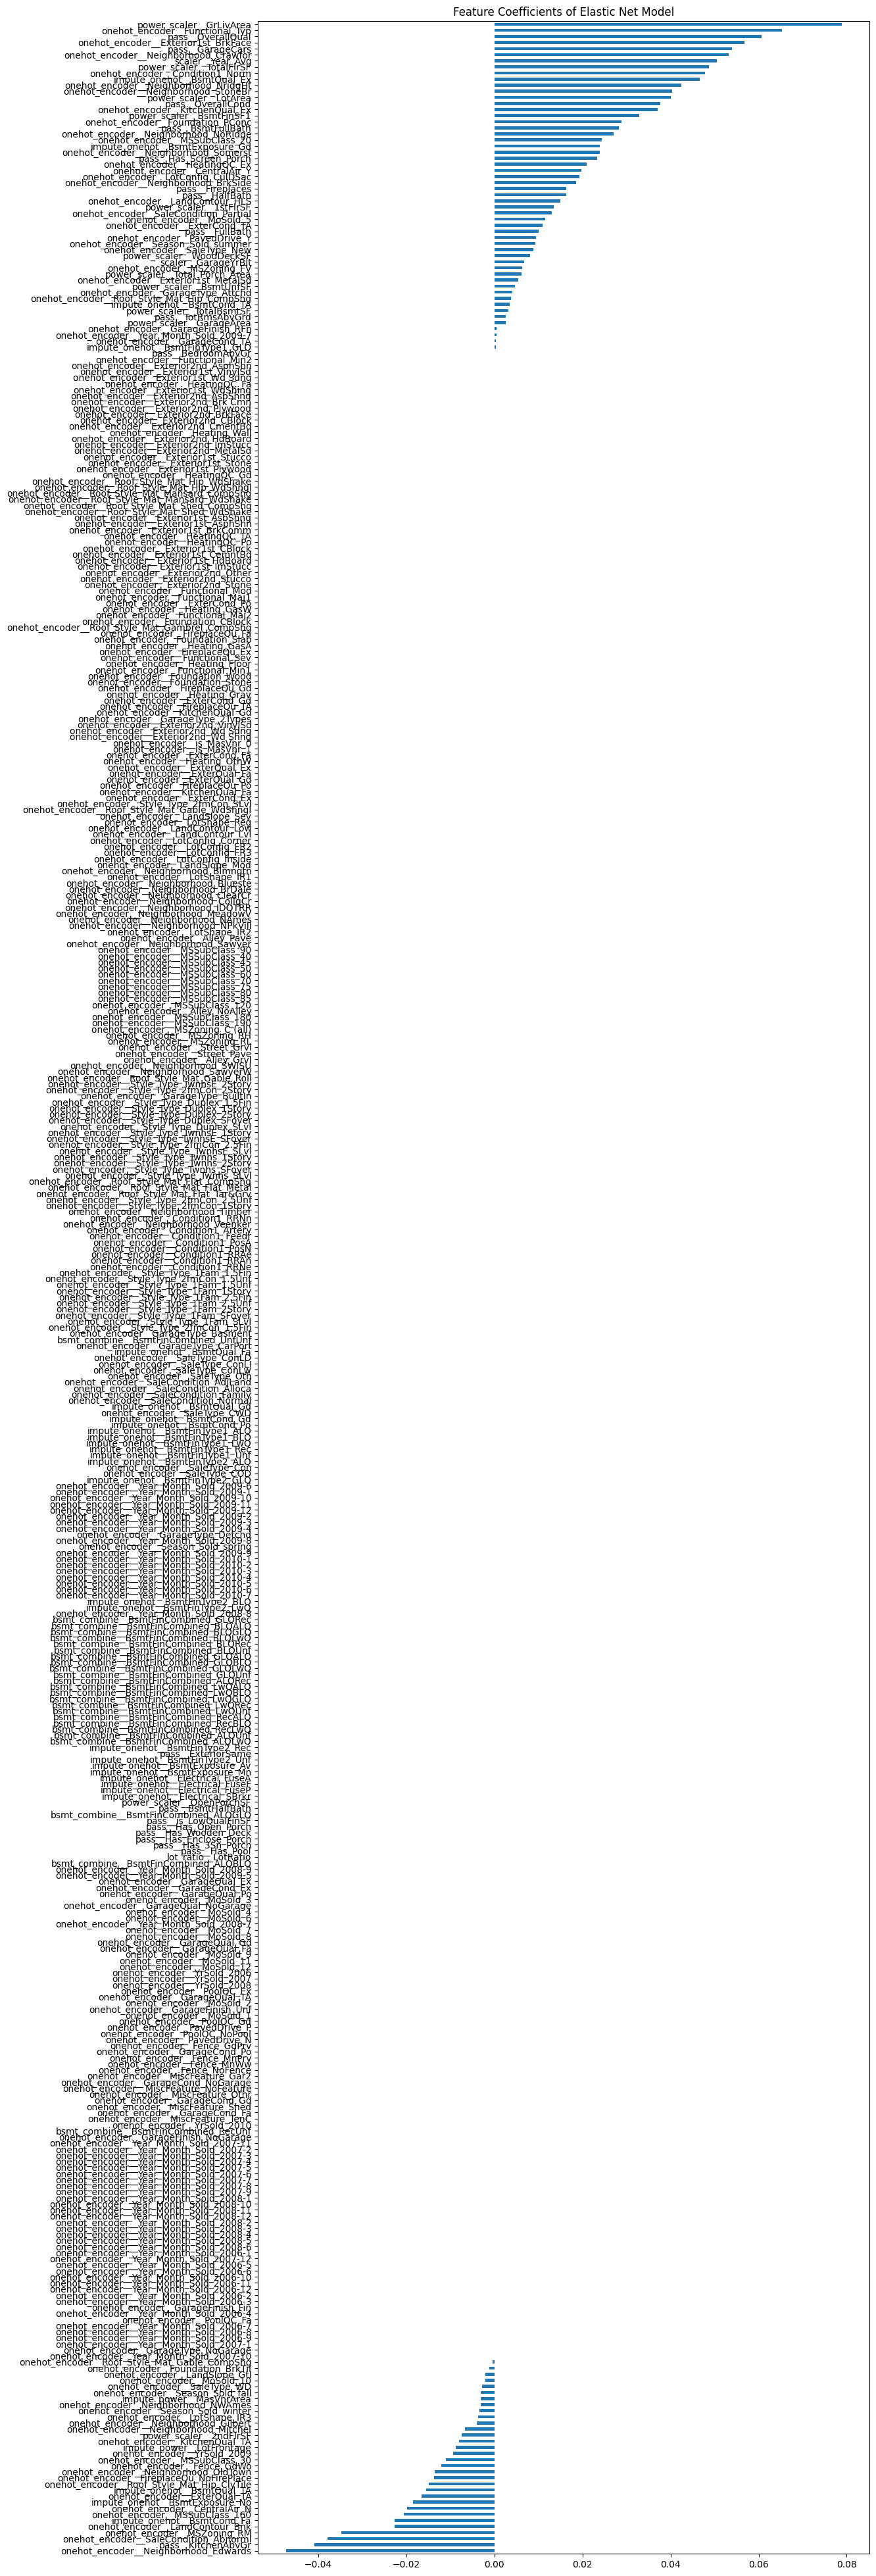

In [19]:
coef_df = pd.Series(trained_elastic_net_model_coef, index = trained_elastic_net_model_feature)
coef_df.sort_values().plot(kind = 'barh', figsize = [12, 50])
plt.title('Feature Coefficients of Elastic Net Model')